In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Data Preprocessing

In [18]:
def normalize(df):
    result = df.copy()
    max_value = df.max()
    min_value = df.min()
    result = (df - min_value) / (max_value - min_value)
    return result

from pandas.api.types import is_string_dtype

data = pd.read_csv('../input/german-credit-data-with-risk/german_credit_data.csv',index_col=0,sep=',')
labels = data.columns
# lets go through column 2 column
for col in labels:
    if is_string_dtype(data[col]):
        if col == 'Risk':
            # we want 'Risk' to be a binary variable
            data[col] = pd.factorize(data[col])[0]
            continue
        # the other categorical columns should be one-hot encoded
        data = pd.concat([data, pd.get_dummies(data[col], prefix=col)], axis=1)
        data.drop(col, axis=1, inplace=True)
    else:
        data[col] = normalize(data[col])

# move 'Risk' back to the end of the df
data = data[[c for c in data if c not in ['Risk']] + ['Risk']]

data_train = data.iloc[:800]
data_valid = data.iloc[800:]
x_train = data_train.iloc[:,:-1]
y_train = data_train.iloc[:,-1]
x_val = data_valid.iloc[:,:-1]
y_val = data_valid.iloc[:,-1]

# Model definition

In [19]:
from keras.models import Sequential
from keras import regularizers
from keras import optimizers
from keras.layers import Dense, Dropout

sgd = optimizers.SGD(lr=0.03, decay=0, momentum=0.9, nesterov=False)

model = Sequential()
model.add(Dense(units=50, activation='tanh', input_dim=24, kernel_initializer='glorot_normal', bias_initializer='zeros'))#, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.35))
model.add(Dense(units=1, activation='sigmoid', kernel_initializer='glorot_normal', bias_initializer='zeros'))
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train.values, y_train.values, validation_data=(x_val.values, y_val.values), epochs=30, batch_size=128)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 800 samples, validate on 200 samples
Epoch 1/30
800/800 [==============================] - 0s 350us/step - loss: 0.6617 - acc: 0.6763 - val_loss: 0.6511 - val_acc: 0.6800
Epoch 2/30
800/800 [==============================] - 0s 19us/step - loss: 0.6428 - acc: 0.6763 - val_loss: 0.6200 - val_acc: 0.6800
Epoch 3/30
800/800 [==============================] - 0s 18us/step - loss: 0.6002 - acc: 0.6938 - val_loss: 0.5965 - val_acc: 0.6750
Epoch 4/30
800/800 [==============================] - 0s 20us/step - loss: 0.5827 - acc: 0.7075 - val_loss: 0.5802 - val_acc: 0.6800
Epoch 5/30
800/800 [==============================] - 0s 21us/step - loss: 0.5695 - acc: 0.7087 - val_loss: 0.5654 - val_acc: 0.6900
Epoch 6/30
800/800 [==============================] - 0s 21us/step - loss: 0.5587 - acc: 0.7112 - val_loss: 0.5542 - val_acc: 0.7000
Epoch 7/30
800/800 [====================

In [26]:
model.fit(x_train.values, y_train.values, validation_data=(x_val.values, y_val.values), epochs=30, batch_size=128)

Train on 800 samples, validate on 200 samples
Epoch 1/30
800/800 [==============================] - 0s 69us/step - loss: 0.5109 - acc: 0.7512 - val_loss: 0.5150 - val_acc: 0.7450
Epoch 2/30
800/800 [==============================] - 0s 16us/step - loss: 0.5143 - acc: 0.7450 - val_loss: 0.5142 - val_acc: 0.7400
Epoch 3/30
800/800 [==============================] - 0s 17us/step - loss: 0.5031 - acc: 0.7575 - val_loss: 0.5130 - val_acc: 0.7350
Epoch 4/30
800/800 [==============================] - 0s 18us/step - loss: 0.5107 - acc: 0.7612 - val_loss: 0.5122 - val_acc: 0.7250
Epoch 5/30
800/800 [==============================] - 0s 15us/step - loss: 0.5017 - acc: 0.7575 - val_loss: 0.5122 - val_acc: 0.7150
Epoch 6/30
800/800 [==============================] - 0s 15us/step - loss: 0.5068 - acc: 0.7500 - val_loss: 0.5123 - val_acc: 0.7250
Epoch 7/30
800/800 [==============================] - 0s 15us/step - loss: 0.5090 - acc: 0.7450 - val_loss: 0.5129 - val_acc: 0.7200
Epoch 8/30
800/800 [===

# Performance validation

Precision Score on validation data is 0.7390525746722529


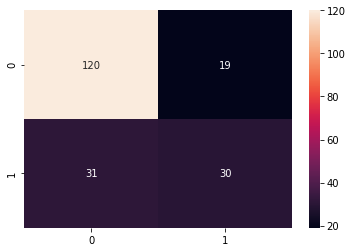

In [27]:
y_pred = model.predict_classes(x_val.values)
y_val = y_val.values

from sklearn.metrics import confusion_matrix, precision_score
import seaborn as sns

sns.heatmap(confusion_matrix(y_val,y_pred),annot=True,fmt='.5g') 
print('Precision Score on validation data is {}'.format(precision_score(y_val, y_pred, average='weighted')))